<a href="https://colab.research.google.com/github/Sameeksha-12/Water-leak-detection/blob/main/complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!dir

drive  sample_data  water.csv  water_dataset  water_leakage.txt  water_shuffle1.csv


In [ ]:
import os

In [ ]:
from zipfile import ZipFile
zip_path = '/content/drive/MyDrive/Colab Notebooks/water_dataset.zip'

with ZipFile(zip_path, 'r') as zip:
  zip.extractall()
  print('Yayy')

Yayy


In [ ]:
!dir


drive  sample_data  water.csv  water_dataset  water_leakage.txt  water_shuffle1.csv


In [ ]:
leak_dir = '/content/water_dataset/Leak'
non_leak_dir = '/content/water_dataset/Nonleak'

In [ ]:
output_file = '/content/water_leakage.txt'

with open(output_file, 'w') as f:
    f.write("audio,leakage\n")  # Write the header

    # Process Leak files
    if os.path.exists(leak_dir):
        for file_name in os.listdir(leak_dir):
            file_path = os.path.join(leak_dir, file_name)
            f.write(f"{file_path},1\n")
    else:
        print(f"Error: Directory '{leak_dir}' not found.")

    # Process Non-Leak files
    if os.path.exists(non_leak_dir):
        for file_name in os.listdir(non_leak_dir):
            file_path = os.path.join(non_leak_dir, file_name)
            f.write(f"{file_path},0\n")
    else:
        print(f"Error: Directory '{non_leak_dir}' not found.")

In [ ]:
with open(output_file, 'r') as f:
    lines = f.readlines()
    for line in lines[:10]:  # Print first 10 lines as a sample
        print(line.strip())

audio,leakage
/content/water_dataset/Leak/1.2.01.0330.wav,1
/content/water_dataset/Leak/3.2.04.0415.wav,1
/content/water_dataset/Leak/1.4.01.0330.wav,1
/content/water_dataset/Leak/1.3.04.0415.wav,1
/content/water_dataset/Leak/3.3.01.0330.wav,1
/content/water_dataset/Leak/022_00263-20180605.wav,1
/content/water_dataset/Leak/1.2.02.0345.wav,1
/content/water_dataset/Leak/1.7.01.0330.wav,1
/content/water_dataset/Leak/3.1.01.0330.wav,1


In [ ]:
import pandas as pd

df = pd.read_csv(output_file)

csv_file = '/content/water.csv'
df.to_csv(csv_file, index=False)

df = pd.read_csv(csv_file)

df_shuffled = df.sample(frac=1).reset_index(drop=True)
shuffled_csv_file = '/content/water_shuffle1.csv'
df_shuffled.to_csv(shuffled_csv_file, index=False)

print("Shuffled CSV file created successfully.")

Shuffled CSV file created successfully.


In [ ]:
data = pd.read_csv('/content/water_shuffle1.csv')
data.head()

,audio,leakage
0,/content/water_dataset/Nonleak/07550_20170609_...,0
1,/content/water_dataset/Leak/3.2.01.0330.wav,1
2,/content/water_dataset/Nonleak/2.6.03.0830.wav,0
3,/content/water_dataset/Nonleak/2.4.01.0330.wav,0
4,/content/water_dataset/Leak/1.3.04.0415.wav,1


In [ ]:
data.iloc[2][0]

'/content/water_dataset/Nonleak/2.6.03.0830.wav'

In [ ]:
filename = '/content/water_dataset/Leak/1.7.04.0415.wav'

In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio(filename)

In [ ]:
import wave

In [ ]:
wav = wave.open(filename)

In [ ]:
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  4096
Total samples (frames) =  40960
Duration =  10.0


In [ ]:
!pip uninstall -y resampy librosa

Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
Found existing installation: librosa 0.10.2.post1
Uninstalling librosa-0.10.2.post1:
  Successfully uninstalled librosa-0.10.2.post1


In [ ]:
!pip install resampy librosa

  Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
  Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)


In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

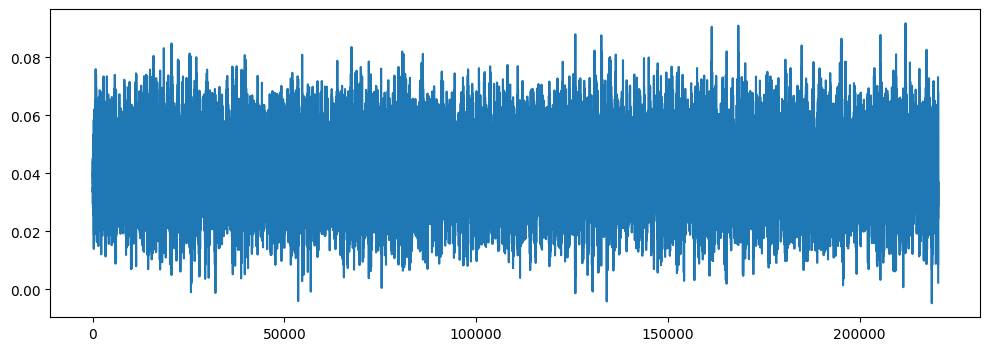

In [ ]:
librosa_audio_data,librosa_sample_rate = librosa.load(filename)
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [ ]:
import sklearn
import numpy as np
from sklearn.preprocessing import minmax_scale
def feature_extractor(file):
  audio,sample_rate = librosa.load(file,res_type='kaiser_fast')
  audio = minmax_scale(audio,axis=0)
  mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  return mfccs_scaled_features

In [ ]:
import librosa
import resampy

print(f"librosa version: {librosa.__version__}")
print(f"resampy version: {resampy.__version__}")

librosa version: 0.10.2.post1
resampy version: 0.4.3


In [ ]:
from librosa.core import audio

print("Dependencies loaded successfully.")

Dependencies loaded successfully.


In [ ]:
from tqdm import tqdm
extracted_features = []
for idx_num,row in tqdm(data.iterrows()):
  file_name = os.path.join((row["audio"]))
  final_label = row["leakage"]
  data1 = feature_extractor(file_name)
  extracted_features.append([data1,final_label])

140it [00:22,  6.21it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-310.8528, 252.19348, 78.25626, -37.549294, -...",0
1,"[-321.66925, 127.7756, -15.848858, -0.9010926,...",1
2,"[-324.71014, 135.85553, -9.296015, 1.85427, 34...",0
3,"[-244.61612, 171.30226, -39.326984, 3.4812086,...",0
4,"[-276.14487, 243.4172, -4.357382, -107.3111, -...",1


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(140, 40)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-346.60666   ,  200.23695   ,   57.326538  , ...,    3.876118  ,
           6.879308  ,    5.798812  ],
       [-280.74658   ,  237.30826   ,   -3.2866693 , ...,    3.6527727 ,
          10.240767  ,    7.2940516 ],
       [-273.82718   ,  249.01122   ,    0.64993435, ...,    5.494962  ,
           8.375243  ,    4.8964763 ],
       ...,
       [-249.92928   ,  169.97037   ,  -37.12353   , ...,    4.3744726 ,
           4.0250015 ,    6.222886  ],
       [-411.08972   ,  147.07443   ,   80.26431   , ...,    2.8147075 ,
           1.2562429 ,    1.3332517 ],
       [-341.7931    ,  178.84512   ,   48.293358  , ...,    1.8028324 ,
           2.6163168 ,    1.1746726 ]], dtype=float32)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
X_train.shape

(112, 40)

In [ ]:
X_test.shape

(28, 40)

In [ ]:
y_train.shape

(112,)

In [ ]:
y_test.shape

(28,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels = 1

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 5
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/4 [======>.......................] - ETA: 3s - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.00000, saving model to saved_models/audio_classification.hdf5
4/4 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 0.5268 - val_loss: 0.0000e+00 - val_accuracy: 0.3929
Epoch 2/5
1/4 [======>.......................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 2: val_loss did not improve from 0.00000
4/4 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5268 - val_loss: 0.0000e+00 - val_accuracy: 0.3929
Epoch 3/5
1/4 [======>.......................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3: val_loss did not improve from 0.00000
4/4 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5268 - val_loss: 0.0000e+00 - val_accuracy: 0.3929
Epoch 4/5
1/4 [======>.......................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4: val_loss did no

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_loss did not improve from 0.00000
4/4 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5268 - val_loss: 0.0000e+00 - val_accuracy: 0.3929
Training completed in time:  0:00:01.771749


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.3928571343421936


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Input,Convolution1D,MaxPool1D,GlobalMaxPool1D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
input_length=40
from keras import models,optimizers,losses
import tensorflow as tf

In [ ]:
from keras.backend import batch_normalization
nclass=1
inp = Input(shape=(input_length,1))
x = Convolution1D(16, 3, activation='relu', padding="valid")(inp)
x = Convolution1D(16, 3, activation='relu', padding="valid")(x)



x = Convolution1D(32, 3, activation='relu', padding="valid")(x)
x = BatchNormalization()(x)



x = Convolution1D(64, 3, activation='relu', padding="valid")(x)
x = BatchNormalization()(x)


x = Convolution1D(256, 3, activation='relu', padding="valid")(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(nclass, activation='sigmoid')(x)

model = models.Model(inputs=inp, outputs=out)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=16,epochs=15,validation_data=(X_test, y_test),verbose=1)

Epoch 1/15
7/7 [==============================] - 3s 78ms/step - loss: 0.9996 - acc: 0.5625 - val_loss: 0.6615 - val_acc: 0.3929
Epoch 2/15
7/7 [==============================] - 0s 23ms/step - loss: 0.7491 - acc: 0.6607 - val_loss: 0.5650 - val_acc: 0.8214
Epoch 3/15
7/7 [==============================] - 0s 22ms/step - loss: 0.8265 - acc: 0.5714 - val_loss: 0.5397 - val_acc: 0.8214
Epoch 4/15
7/7 [==============================] - 0s 21ms/step - loss: 0.6846 - acc: 0.6786 - val_loss: 0.5603 - val_acc: 0.6071
Epoch 5/15
7/7 [==============================] - 0s 21ms/step - loss: 0.5460 - acc: 0.6964 - val_loss: 0.5575 - val_acc: 0.6429
Epoch 6/15
7/7 [==============================] - 0s 24ms/step - loss: 0.6048 - acc: 0.6607 - val_loss: 0.5443 - val_acc: 0.6429
Epoch 7/15
7/7 [==============================] - 0s 23ms/step - loss: 0.4562 - acc: 0.7679 - val_loss: 0.4999 - val_acc: 0.7857
Epoch 8/15
7/7 [==============================] - 0s 23ms/step - loss: 0.4573 - acc: 0.7857 - val

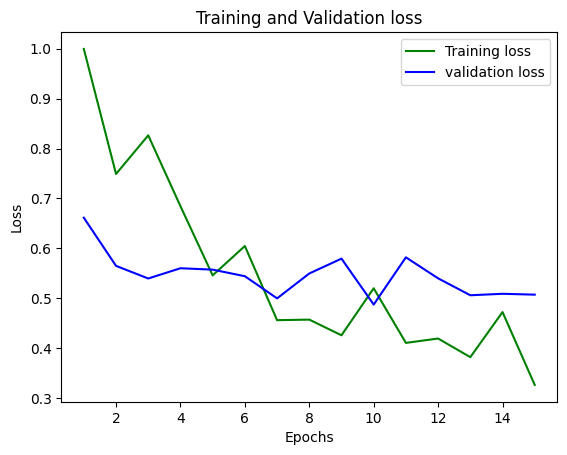

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8571428656578064


In [ ]:
X_test[1]

array([-2.6049808e+02,  1.6822900e+02, -3.5192451e+01,  4.0531440e+00,
        3.3880215e+01, -1.0169486e+01,  8.0499582e+00,  1.7589857e+01,
       -6.4388885e+00,  1.0006359e+01,  1.6176298e+01, -1.4607168e+00,
        9.6461372e+00,  1.3282327e+01,  1.4862164e+00,  9.9256840e+00,
        9.7498922e+00, -9.9835759e-03,  8.2403679e+00,  8.9374704e+00,
        1.6582029e+00,  7.7757306e+00,  8.0629559e+00,  4.0522833e+00,
        9.3663197e+00,  7.3441381e+00,  3.2381108e+00,  8.1061602e+00,
        6.5955076e+00,  2.9927132e+00,  5.6773257e+00,  3.9269979e+00,
        3.1285675e+00,  6.8279161e+00,  4.5700302e+00,  3.1636317e+00,
        6.2029419e+00,  5.0105095e+00,  4.5765600e+00,  6.0396209e+00],
      dtype=float32)

In [ ]:
predictions=model.predict(X_test)
print(predictions)

1/1 [==============================] - 0s 186ms/step
[[0.2835855 ]
 [0.27644873]
 [0.28692564]
 [0.2828931 ]
 [0.985454  ]
 [0.29560158]
 [0.38172507]
 [0.89392275]
 [0.9975699 ]
 [0.99674094]
 [0.5475742 ]
 [0.61337006]
 [0.5448028 ]
 [0.9881034 ]
 [0.94202864]
 [0.9967668 ]
 [0.8615951 ]
 [0.26549172]
 [0.4046535 ]
 [0.99626464]
 [0.45692855]
 [0.9505936 ]
 [0.9992355 ]
 [0.40866014]
 [0.46079332]
 [0.6942705 ]
 [0.30528408]
 [0.34638235]]


In [ ]:
predictions[np.where(predictions>0.5)]=1
predictions[np.where(predictions<0.5)]=0

In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)